# DOMAIN: Electronics and Telecommunication
## • CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
## Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

### • DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

## • PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.

In [35]:
#Part A - Q1 A - Read the ‘Signals.csv’ as DatFrame and import required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats 
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.layers import Dense, Activation, LeakyReLU,ReLU
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Read the data as a data frame
nn_signal = pd.read_csv('NN Project Data - Signal.csv')

In [36]:
nn_signal.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [37]:
#Part A - Q1 B - Check for missing values and print percentage for each attribute.
nn_signal.isnull().mean() * 100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [38]:
# Note: No missing values in data

In [39]:
nn_signal.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [40]:
# count for all parmeters have 1599 records hence proces no missing values

In [41]:
#Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

nn_signal_duplicate = nn_signal[nn_signal.duplicated()]
 
print("Duplicate Rows in the dataframe are:")
 
# Print the dataframe with duplicate rows
nn_signal_duplicate

Duplicate Rows in the dataframe are:


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [42]:
#240 row are duplicate

In [43]:
# Drop duplicate rows
nn_signal.drop_duplicates(keep='first',inplace=True)

In [44]:
nn_signal

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

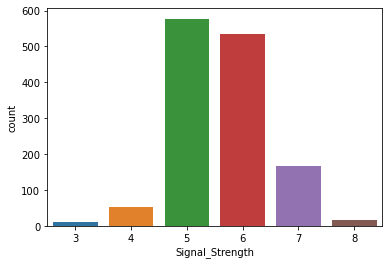

In [45]:
#Part A - Q1 D - Visualise distribution of the target variable.
sns.countplot(nn_signal['Signal_Strength']) 

In [46]:
#Part A - Q1 E - Share insights from the initial data analysis (at least 2).
# There are 6 categories of signal to be predicted from label 3 to 8 
# Class 5 and Class 6 has highest count
# 240 duplicate rows were present in data that were removed.

In [47]:
#Part A - Q2 A - Split the data into X & Y.
X = nn_signal.drop('Signal_Strength', axis=1)
y = nn_signal.pop('Signal_Strength')
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [48]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: Signal_Strength, dtype: int64

In [49]:
#Part A - Q2 B - Split the data into train & test with 70:30 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [50]:
# A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [51]:
#Part A - Q2 D - Normalise the train and test data with appropriate method.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
#Part A - Q2 E - Transform Labels into format acceptable by Neural Network
y_train[0]

5

In [53]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=9)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=9)

In [54]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [55]:
#Part A - Q3 A - Design a Neural Network to train a classifier.

# splitting data for  train and validation of categorial 
Xc_train, Xc_val, yc_train, yc_val = train_test_split(X_train, y_train, test_size=.20, random_state=1)

#Initialize Sequential model
model = tensorflow.keras.models.Sequential()

#Add 1st hidden layer
model.add(tensorflow.keras.layers.Dense(128,kernel_initializer='normal', activation='sigmoid'))

#Add 2nd hidden layer
model.add(tensorflow.keras.layers.Dense(64,kernel_initializer='normal', activation='sigmoid'))

#Add 3rd hidden layer
model.add(tensorflow.keras.layers.Dense(32,kernel_initializer='normal', activation='sigmoid'))
model.add(LeakyReLU(alpha=0.1))

#Add OUTPUT layer
model.add(tensorflow.keras.layers.Dense(9, kernel_initializer='normal',activation='softmax'))

#Compile the model
model.compile(optimizer='sgd',loss='mean_absolute_error', metrics=['accuracy'])

In [56]:
#Part A - Q3 B - Train the classifier using previously designed Architecture
EPOCH=300
model_cal=model.fit(x=Xc_train, y=yc_train, batch_size=30, epochs= EPOCH, validation_data=(Xc_val, yc_val))

Epoch 1/300
26/26 [==============================] - 0s 6ms/step - loss: 0.1976 - accuracy: 0.0000e+00 - val_loss: 0.1975 - val_accuracy: 0.0000e+00
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.0000e+00 - val_loss: 0.1971 - val_accuracy: 0.0000e+00
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.0000e+00 - val_loss: 0.1966 - val_accuracy: 0.0000e+00
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.2382 - val_loss: 0.1962 - val_accuracy: 0.4293
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.4316 - val_loss: 0.1957 - val_accuracy: 0.4293
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.4316 - val_loss: 0.1953 - val_accuracy: 0.4293
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.4316 - val_loss: 0.1948 - val_accura

26/26 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.4316 - val_loss: 0.1544 - val_accuracy: 0.4293
Epoch 59/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.4316 - val_loss: 0.1536 - val_accuracy: 0.4293
Epoch 60/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.4316 - val_loss: 0.1528 - val_accuracy: 0.4293
Epoch 61/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.4316 - val_loss: 0.1520 - val_accuracy: 0.4293
Epoch 62/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.4316 - val_loss: 0.1512 - val_accuracy: 0.4293
Epoch 63/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.4316 - val_loss: 0.1504 - val_accuracy: 0.4293
Epoch 64/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.4316 - val_loss: 0.1497 - val_accuracy: 0.4293
Epoch 65/300
26/26 

Epoch 116/300
26/26 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 0.4316 - val_loss: 0.1328 - val_accuracy: 0.4293
Epoch 117/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.4316 - val_loss: 0.1327 - val_accuracy: 0.4293
Epoch 118/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.4316 - val_loss: 0.1326 - val_accuracy: 0.4293
Epoch 119/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.4316 - val_loss: 0.1325 - val_accuracy: 0.4293
Epoch 120/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.4316 - val_loss: 0.1324 - val_accuracy: 0.4293
Epoch 121/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.4316 - val_loss: 0.1323 - val_accuracy: 0.4293
Epoch 122/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.4316 - val_loss: 0.1322 - val_accuracy: 0.4293

26/26 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.4316 - val_loss: 0.1296 - val_accuracy: 0.4293
Epoch 174/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.4316 - val_loss: 0.1295 - val_accuracy: 0.4293
Epoch 175/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.4316 - val_loss: 0.1295 - val_accuracy: 0.4293
Epoch 176/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.4316 - val_loss: 0.1295 - val_accuracy: 0.4293
Epoch 177/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.4316 - val_loss: 0.1295 - val_accuracy: 0.4293
Epoch 178/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.4316 - val_loss: 0.1294 - val_accuracy: 0.4293
Epoch 179/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.4316 - val_loss: 0.1294 - val_accuracy: 0.4293
Epoch 180/300

26/26 [==============================] - 0s 5ms/step - loss: 0.1281 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 231/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 232/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 233/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 234/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 235/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 236/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.4316 - val_loss: 0.1285 - val_accuracy: 0.4293
Epoch 237/300

26/26 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 288/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 289/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 290/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 291/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 292/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 293/300
26/26 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.4316 - val_loss: 0.1280 - val_accuracy: 0.4293
Epoch 294/300

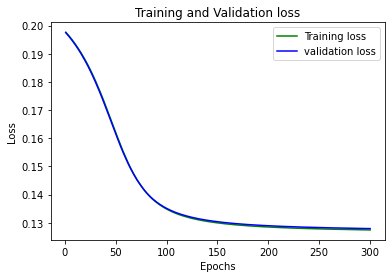

In [57]:
#Part A - Q3 C - Plot 2 separate visuals. 
#i. Training Loss and Validation Loss 
loss_train = model_cal.history['loss']
loss_val = model_cal.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

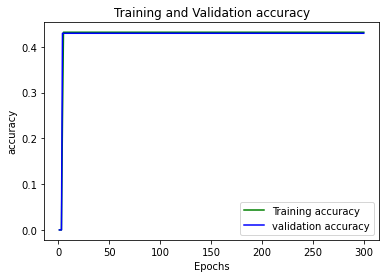

In [58]:
#ii. Training Accuracy and Validation Accuracy
Acc_train = model_cal.history['accuracy']
Acc_val = model_cal.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [59]:
#Part A - Q3 D - Design new architecture/update existing architecture 
#in attempt to improve the performance of the model.

#Initialize Sequential model
model = tensorflow.keras.models.Sequential()

#Add 1st hidden layer
model.add(tensorflow.keras.layers.Dense(128,kernel_initializer='normal', activation='relu'))

#Add 2nd hidden layer
model.add(tensorflow.keras.layers.Dense(64,kernel_initializer='normal', activation='relu'))

#Add 3rd hidden layer
model.add(tensorflow.keras.layers.Dense(32,kernel_initializer='normal', activation='relu'))
model.add(LeakyReLU(alpha=0.1))

#Add 4th hidden layer
model.add(tensorflow.keras.layers.Dense(16,kernel_initializer='normal', activation='relu'))
model.add(LeakyReLU(alpha=0.1))

#Add OUTPUT layer
model.add(tensorflow.keras.layers.Dense(9, kernel_initializer='normal',activation='softmax'))

In [60]:
#Compile the model
model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['accuracy'])

In [61]:
EPOCH=300
model_cal=model.fit(x=Xc_train, y=yc_train, batch_size=32, epochs= EPOCH, validation_data=(Xc_val, yc_val))

Epoch 1/300
24/24 [==============================] - 1s 7ms/step - loss: 0.1970 - accuracy: 0.4303 - val_loss: 0.1959 - val_accuracy: 0.4293
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.4316 - val_loss: 0.1546 - val_accuracy: 0.4293
Epoch 3/300
24/24 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.4316 - val_loss: 0.1229 - val_accuracy: 0.4293
Epoch 4/300
24/24 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.4316 - val_loss: 0.1179 - val_accuracy: 0.4293
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.4316 - val_loss: 0.1159 - val_accuracy: 0.4293
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.4316 - val_loss: 0.1148 - val_accuracy: 0.4293
Epoch 7/300
24/24 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.4316 - val_loss: 0.1127 - val_accuracy: 0.4293
Epoch 8/300
2

Epoch 59/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.7000 - val_loss: 0.0816 - val_accuracy: 0.6335
Epoch 60/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.7039 - val_loss: 0.0880 - val_accuracy: 0.6073
Epoch 61/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.7053 - val_loss: 0.0840 - val_accuracy: 0.6283
Epoch 62/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.7066 - val_loss: 0.0828 - val_accuracy: 0.6283
Epoch 63/300
24/24 [==============================] - 0s 5ms/step - loss: 0.0666 - accuracy: 0.7053 - val_loss: 0.0858 - val_accuracy: 0.6126
Epoch 64/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.7026 - val_loss: 0.0822 - val_accuracy: 0.6335
Epoch 65/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.7053 - val_loss: 0.0860 - val_accuracy: 0.6126
Epoch 

24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 117/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 118/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0869 - val_accuracy: 0.6126
Epoch 119/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 120/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 121/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0870 - val_accuracy: 0.6126
Epoch 122/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 123/300

24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0869 - val_accuracy: 0.6126
Epoch 174/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 175/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 176/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0869 - val_accuracy: 0.6126
Epoch 177/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 178/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0869 - val_accuracy: 0.6126
Epoch 179/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0869 - val_accuracy: 0.6126
Epoch 180/300

24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 231/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 232/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 233/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 234/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 235/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0867 - val_accuracy: 0.6126
Epoch 236/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0868 - val_accuracy: 0.6126
Epoch 237/300

24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0866 - val_accuracy: 0.6126
Epoch 288/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0866 - val_accuracy: 0.6126
Epoch 289/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0866 - val_accuracy: 0.6126
Epoch 290/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0866 - val_accuracy: 0.6126
Epoch 291/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0867 - val_accuracy: 0.6126
Epoch 292/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0866 - val_accuracy: 0.6126
Epoch 293/300
24/24 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.7197 - val_loss: 0.0866 - val_accuracy: 0.6126
Epoch 294/300

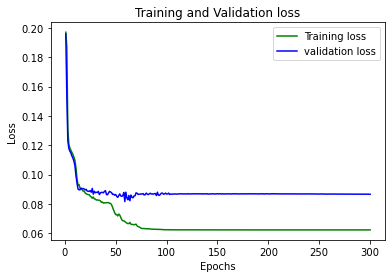

In [62]:
#Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.
loss_train = model_cal.history['loss']
loss_val = model_cal.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

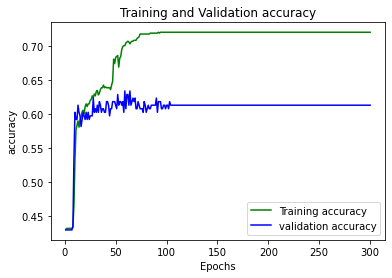

In [63]:
Acc_train = model_cal.history['accuracy']
Acc_val = model_cal.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [64]:
# Observations:
# 2nd model is better using ADAM as the optimsier and RELU as activation function instead of SGD ( stocastic gradient descent)
# Accuracy of the model increased from 42% to 62% when RELU was used as the activation function instead of sigmoid

# DOMAIN: Autonomous Vehicles
## • CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

## • DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

## Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively. The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
## Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
## http://ufldl.stanford.edu/housenumbers as the URL for this

In [65]:
import numpy as np 
import pandas as pd 
import json
import tensorflow as tf
import keras as kr
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
import h5py

In [66]:
#Part B - Q1 A - Read the .h5 file and assign to a variable.
datah5py=h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [67]:
#Part B - Q1 B - Print all the keys from the .h5 file.
datah5py.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [68]:
#Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test
X_train=datah5py['X_train']
X_test=datah5py['X_test']
X_val=datah5py['X_val']
y_train=datah5py['y_train']
y_test=datah5py['y_test']
y_val=datah5py['y_val']

In [70]:
#Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

print("Training data   X-train Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data    X-test Shape  :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-val Shape   :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data   y-train Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data    y-test Shape  :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-val Shape   :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data   X-train Shape : (42000, 32, 32) and Data Type :  float32
Testing data    X-test Shape  : (18000, 32, 32) and Data Type :  float32
Validation data X-val Shape   : (60000, 32, 32) and Data Type :  float32
Training data   y-train Shape : (42000,) and Data Type :  uint8
Testing data    y-test Shape  : (18000,) and Data Type :  uint8
Validation data y-val Shape   : (60000,) and Data Type :  uint8


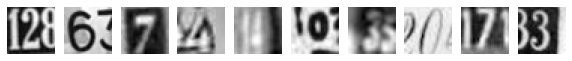

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [71]:
#Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))